# Benchmark Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

### Load Data and Display Summary

In [2]:
csv_path = '/Users/lais.ziegler/Documents/github - laiszig/BFTBrain/analysis/benchmark_csv/benchmarks.csv'

if not os.path.exists(csv_path):
    print(f"Error: CSV file not found at '{csv_path}'")
else:
    df = pd.read_csv(csv_path)
    print("Benchmark data loaded successfully.")
    
    summary = df.groupby('protocol').agg({
        'throughput': ['mean', 'std', 'min', 'max'],
        'latency_avg_s': ['mean', 'std', 'min', 'max'],
        'avg_block_exec_time_ms': ['mean', 'std', 'min', 'max']
    }).round(2)

    print("--- Benchmark Summary ---")
    print(summary)

Benchmark data loaded successfully.
--- Benchmark Summary ---
         throughput                         latency_avg_s                    \
               mean     std     min     max          mean   std   min   max   
protocol                                                                      
hotstuff     191.53  319.28    0.00  856.67          0.73  1.08  0.00  3.55   
pbft         160.22   79.17    0.00  206.67          4.00  1.99  0.00  5.05   
sbft         198.70    4.38  183.33  206.67          4.90  0.60  1.52  5.18   
zyzzyva      197.74    6.16  170.00  203.33          4.89  0.69  1.50  5.47   

         avg_block_exec_time_ms                        
                           mean    std    min     max  
protocol                                               
hotstuff                  19.92  30.76   0.00  161.59  
pbft                      27.86  14.45   0.00   44.30  
sbft                     137.89  41.86  45.06  163.24  
zyzzyva                    0.00   0.00   0.00   

### Throughput Comparison

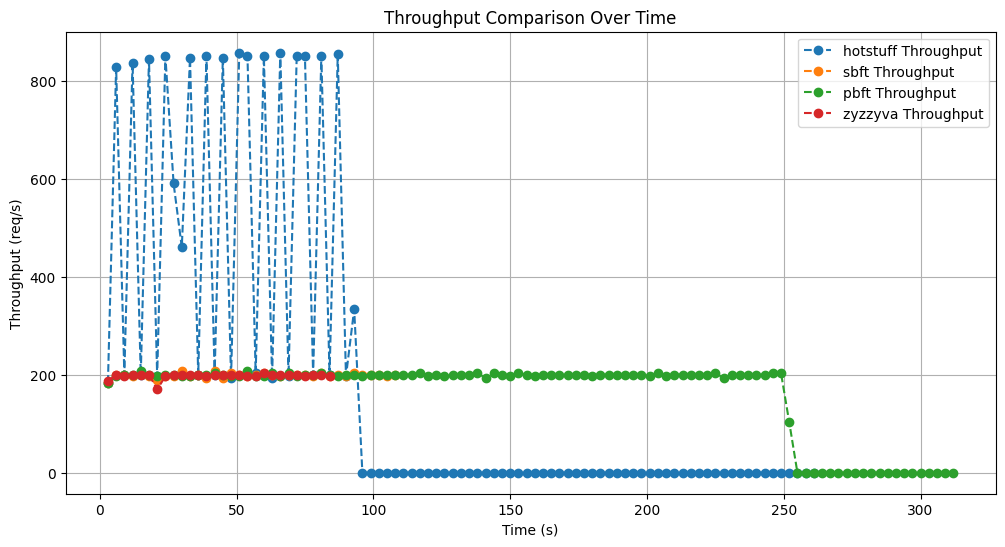

In [3]:
plt.figure(figsize=(12, 6))
for protocol in df['protocol'].unique():
    subset = df[df['protocol'] == protocol]
    plt.plot(subset['timestamp'], subset['throughput'], label=f'{protocol} Throughput', marker='o', linestyle='--')
plt.title('Throughput Comparison Over Time')
plt.xlabel('Time (s)')
plt.ylabel('Throughput (req/s)')
plt.legend()
plt.grid(True)
plt.show()

### Latency Comparison

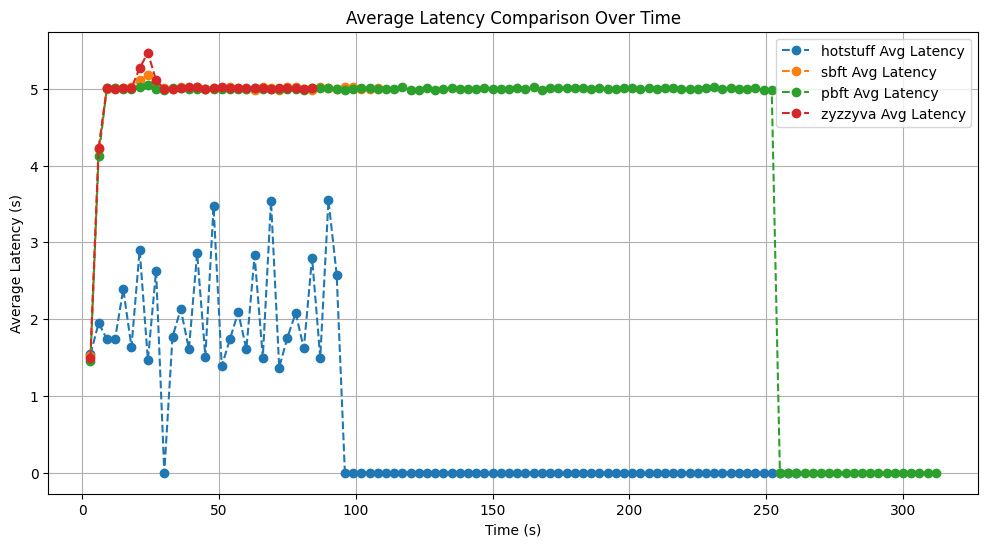

In [4]:
plt.figure(figsize=(12, 6))
for protocol in df['protocol'].unique():
    subset = df[df['protocol'] == protocol]
    plt.plot(subset['timestamp'], subset['latency_avg_s'], label=f'{protocol} Avg Latency', marker='o', linestyle='--')
plt.title('Average Latency Comparison Over Time')
plt.xlabel('Time (s)')
plt.ylabel('Average Latency (s)')
plt.legend()
plt.grid(True)
plt.show()

### Block Execution Time Comparison

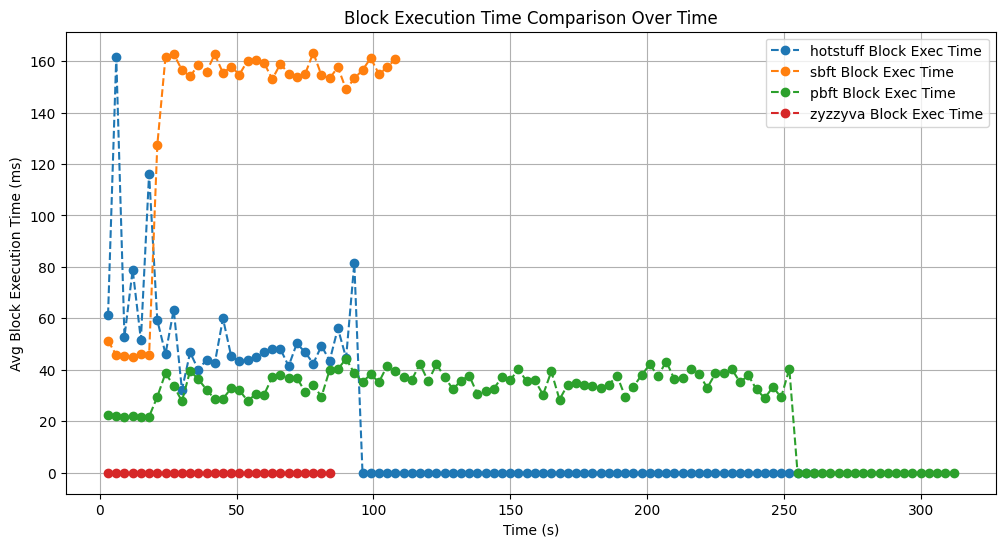

In [5]:
plt.figure(figsize=(12, 6))
for protocol in df['protocol'].unique():
    subset = df[df['protocol'] == protocol]
    plt.plot(subset['timestamp'], subset['avg_block_exec_time_ms'], label=f'{protocol} Block Exec Time', marker='o', linestyle='--')
plt.title('Block Execution Time Comparison Over Time')
plt.xlabel('Time (s)')
plt.ylabel('Avg Block Execution Time (ms)')
plt.legend()
plt.grid(True)
plt.show()